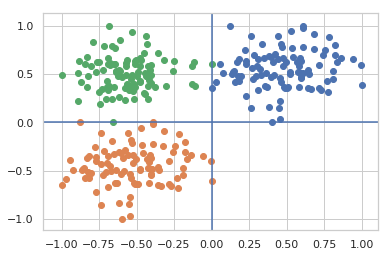

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
x1 = np.random.normal(loc=1, size=100)
x1 = (x1-min(x1))/(max(x1)-min(x1))
x2 = np.random.normal(loc=1, size=100)
x2 = (x2-min(x2))/(max(x2)-min(x2))
y = np.ones(100)*0

x1a = np.random.normal(loc=1, size=100)
x1a = (x1-min(x1))/(max(x1)-min(x1)) -1
x2a = np.random.normal(loc=1, size=100)
x2a = (x2-min(x2))/(max(x2)-min(x2)) -1
ya = np.ones(100)

x1b = np.random.normal(loc=1, size=100)
x1b = (x1b-min(x1b))/(max(x1b)-min(x1b)) -1
x2b = np.random.normal(loc=1, size=100)
x2b = (x2b-min(x2b))/(max(x2b)-min(x2b))
yb = np.ones(100)*2

plt.scatter(x1,x2)
plt.scatter(x1a,x2a)
plt.scatter(x1b,x2b)
plt.axvline(0)
plt.axhline(0)

In [181]:
output = torch.tensor([[0.3416, 0.6336, 0.3775, 0.2556, 0.6288]])
target = torch.zeros_like(output)
target_indices = torch.tensor([[0,2,4]])
target.scatter_(1, target_indices, 1)
target

tensor([[1., 0., 1., 0., 1.]])

In [155]:
x_train1 = np.hstack([x1[:,np.newaxis],x2[:,np.newaxis]])
x_train2 = np.hstack([x1a[:,np.newaxis],x2a[:,np.newaxis]])
x_train3 = np.hstack([x1b[:,np.newaxis],x2b[:,np.newaxis]])
x_train = np.vstack([x_train1, x_train2, x_train3])
y_train = np.hstack([y, ya, yb])

In [419]:
import torch
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
teacher_model = torch.nn.Sequential(
    torch.nn.Linear(2,100),
    torch.nn.ReLU(),
    torch.nn.Linear(100,50),
    torch.nn.ReLU(),
    torch.nn.Linear(50,3),
)
# teacher_model = torch.nn.Sequential(
#     torch.nn.Linear(2,50),
#     torch.nn.ReLU(),
#     torch.nn.Linear(50,25),
#     torch.nn.ReLU(),
#     torch.nn.Linear(25,3),
# )

for m in teacher_model.children():
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            torch.nn.init.normal_(m.bias.data)

In [420]:
teacher_model.train()
# loss_fn = torch.nn.BCELoss()
loss_fn = torch.nn.CrossEntropyLoss()
lr = 1e-4
optimizer = torch.optim.Adam(teacher_model.parameters(), lr=lr)

y_train_ = torch.LongTensor(y_train)
x_train_ = torch.tensor(x_train, dtype=torch.float32)
for i in range(10000):
    y_pred = teacher_model(x_train_)
    loss = loss_fn(torch.nn.LogSoftmax()(y_pred,), y_train_)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

teacher_model.eval()
y_pred = torch.nn.LogSoftmax()(teacher_model(x_train_))
loss = loss_fn((y_pred), y_train_)
print(loss)
sum(torch.argmax(torch.nn.LogSoftmax()(y_pred),dim=1) == y_train_).item()/len(y_train_) * 100

tensor(0.0047, grad_fn=<NllLossBackward>)


100.0

# KD
- hyperparameter might be matter
- student model itself can converge on train data if training it alone
- but in KD model, student model's performance is poor.
- it seems to be required to do hyperparameter grid search

tensor(1.6960, grad_fn=<NllLossBackward>)
student model accuracy(%): 33.33333333333333
tensor(0.0047)
teacher model accuracy(%): 100.0
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

tensor(1.5611, grad_fn=<NllLossBackward>)
student model accuracy(%): 33.33333333333333
tensor(0.0047)
teacher model accuracy(%): 100.0
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

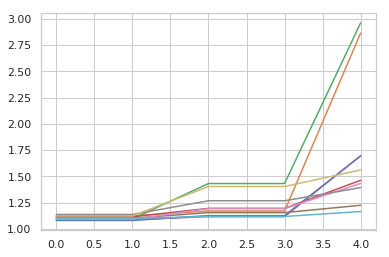

In [424]:
y_train_ = torch.LongTensor(y_train)
x_train_ = torch.tensor(x_train, dtype=torch.float32)

for p in teacher_model.parameters():
    p.requires_grad_(False)
    
teacher_model.eval()
student_model.train()

loss_fn = torch.nn.CrossEntropyLoss()
lr = 1e-3
optimizer = torch.optim.Adam(teacher_model.parameters(), lr=lr)
loss_ls_ls = []
for lambda_factor in np.linspace(1,10,10):
    loss_ls = []
    for i, t in zip(range(10000), np.linspace(1, 10, 10000)):
        student_model = torch.nn.Sequential(
        torch.nn.Linear(2,50),
        torch.nn.ReLU(),
        torch.nn.Linear(50,25),
        torch.nn.ReLU(),
        torch.nn.Linear(25,3),
    )
    for m in student_model.children():
        if isinstance(m, torch.nn.Linear):
            torch.nn.init.xavier_normal_(m.weight.data)
            if m.bias is not None:
                torch.nn.init.normal_(m.bias.data)
        
        y_output = student_model(x_train_)
        y_lesson = teacher_model(x_train_)
        l1 = torch.nn.LogSoftmax()(y_output/t)
        l2 = torch.nn.LogSoftmax()(y_lesson/t)
        kl_loss = F.kl_div(l1, l2)
        loss = loss_fn(torch.nn.LogSoftmax()(y_output), y_train_) + lambda_factor*(t**2)*kl_loss
        loss_ls.append(loss.detach().cpu().numpy().item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    loss_ls_ls.append(loss_ls)
    
    student_model.eval()
    student_output = torch.nn.LogSoftmax()(student_model(x_train_))
    loss = loss_fn(student_output, y_train_)
    print(loss)
    print('student model accuracy(%):',sum(torch.argmax(student_output, dim=1) == y_train_).item()/len(y_train_) * 100)

    teacher_output = torch.nn.LogSoftmax()(teacher_model(x_train_))
    loss = loss_fn(teacher_output, y_train_)
    print(loss)
    print('teacher model accuracy(%):', sum(torch.argmax(teacher_output,dim=1) == y_train_).item()/len(y_train_) * 100)

    print(torch.argmax(student_output, dim=1))
    plt.plot(loss_ls)